#### CIFAR Data Set Classification

In [3]:
##Importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation, MaxPooling2D
from keras.models import Sequential, Model
from keras.datasets import cifar10
from keras import optimizers
from keras.callbacks import EarlyStopping
import tensorflow as tf

In [4]:
#Importing Data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#### Description about Labels
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck

In [129]:
pd.Series(y_train.reshape(-1)).nunique()

10

In [130]:
X_train = X_train/255

X_test = X_test/255

In [131]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

Label [6]


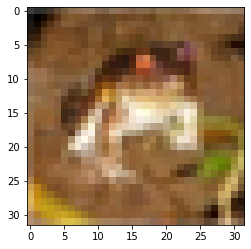

Label [9]


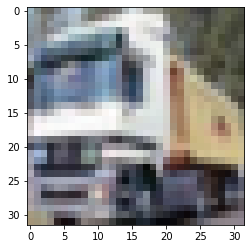

Label [9]


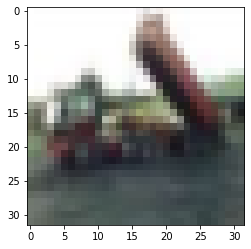

Label [4]


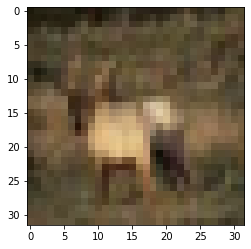

Label [1]


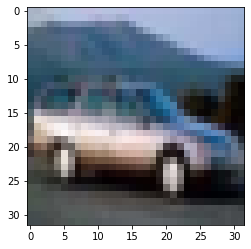

Label [1]


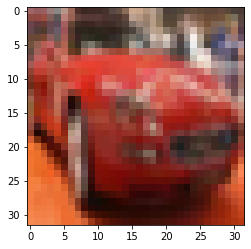

Label [2]


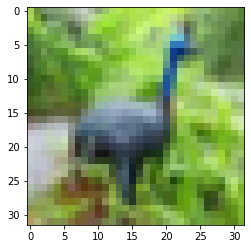

Label [7]


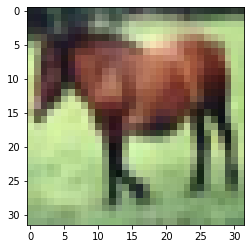

Label [8]


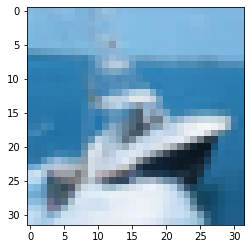

Label [3]


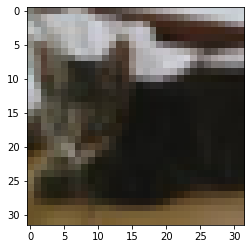

In [132]:
for i in range(10):
  plt.imshow(X_train[i])
  print('Label',y_train[i])
  plt.show()

In [133]:
X_train.shape

(50000, 32, 32, 3)

##### Trial 1

In [138]:
def basic_cnn_1():

  '''
  Function to build a simple Convolution Neural Network
  '''
  model = Sequential()


  #Adding CNN layers + Max_pooling and Activation 
  model.add(Conv2D(input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]),filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  #Flattening Layer before the Dense Layer 
  model.add(Flatten())

  #Dense Layer with 50neurons
  model.add(Dense(50,activation = 'relu'))
  #Classification or the o/p layer 
  model.add(Dense(10,activation = 'softmax'))

  adam = optimizers.Adam(lr = 0.001)
  model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])

  return model

In [5]:
y_train = to_categorical(y_train)

y_test = to_categorical (y_test)

In [139]:
model = basic_cnn_1()

early_stop = EarlyStopping(monitor='val_loss', patience = 8, verbose = 1, mode = 'min' )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [140]:
model.fit(X_train, y_train, batch_size = 16, epochs = 100, callbacks=[early_stop], validation_data = (X_test, y_test))

Epoch 1/100
3125/3125 [==============================] - 10s 3ms/step - loss: 1.7019 - accuracy: 0.3853 - val_loss: 1.2301 - val_accuracy: 0.5665
Epoch 2/100
3125/3125 [==============================] - 9s 3ms/step - loss: 1.1969 - accuracy: 0.5775 - val_loss: 1.1394 - val_accuracy: 0.6006
Epoch 3/100
3125/3125 [==============================] - 9s 3ms/step - loss: 1.0515 - accuracy: 0.6327 - val_loss: 1.1048 - val_accuracy: 0.6148
Epoch 4/100
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9700 - accuracy: 0.6616 - val_loss: 1.1009 - val_accuracy: 0.6216
Epoch 5/100
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9039 - accuracy: 0.6853 - val_loss: 1.0552 - val_accuracy: 0.6372
Epoch 6/100
3125/3125 [==============================] - 9s 3ms/step - loss: 0.8474 - accuracy: 0.7039 - val_loss: 1.0601 - val_accuracy: 0.6397
Epoch 7/100
3125/3125 [==============================] - 9s 3ms/step - loss: 0.7955 - accuracy: 0.7224 - val_loss: 1.0757 - val_a

In [141]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

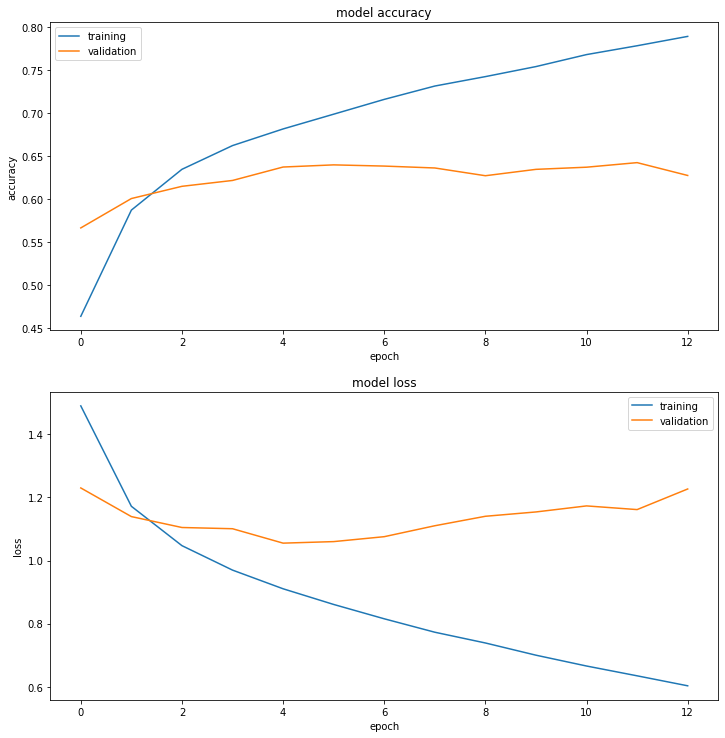

In [142]:
plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(model.history.history['accuracy'], model.history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(model.history.history['loss'], model.history.history['val_loss'], 'loss', 212)

In [147]:
def metrics(y_true, y_pred):
  print('Accuracy Score:', accuracy_score(y_true, y_pred))
  print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
  print('Classification Report:\n', classification_report(y_true, y_pred))

In [148]:
train_pred = model.predict_classes(X_train)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [149]:
test_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [6]:
train_val = []
for i in range(y_train.shape[0]):
    for ind in range(0,10):
        if y_train[i][ind] == 1.0:
            train_val.append(ind)
train_val = pd.Series(np.array(train_val))


test_val = []
for i in range(y_test.shape[0]):
    for ind in range(0,10):
        if y_test[i][ind] == 1.0:
            test_val.append(ind)
test_val = pd.Series(np.array(test_val))

In [152]:
metrics(train_val, train_pred)

Accuracy Score: 0.80436
Confusion Matrix:
 [[4335   49  258   19   41    3    9   35  221   30]
 [  99 4699   23    9    9   13    6    6   69   67]
 [ 227    9 4207   61  167  110   85   64   65    5]
 [  65   30  654 2961  242  567  179  169  110   23]
 [  65    9  889  129 3477  110  118  147   51    5]
 [  20   20  693  466  153 3324   54  195   68    7]
 [  50   27  427  129   82   56 4179   13   28    9]
 [  47    8  258   61  158  128   11 4293   31    5]
 [ 181   56   51   11   13    9    8    8 4640   23]
 [ 162  445   54   20   14    7   11   44  140 4103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      5000
           1       0.88      0.94      0.91      5000
           2       0.56      0.84      0.67      5000
           3       0.77      0.59      0.67      5000
           4       0.80      0.70      0.74      5000
           5       0.77      0.66      0.71      5000
           6       0.90

In [151]:
metrics (test_val, test_pred)

Accuracy Score: 0.6274
Confusion Matrix:
 [[698  25  85  16  26   4   8  15  96  27]
 [ 48 799  16   5   4   6   6  12  34  70]
 [ 85   8 624  41  74  60  45  35  19   9]
 [ 32  18 171 377  66 183  63  48  24  18]
 [ 34   4 219  55 506  39  55  65  21   2]
 [ 13  11 173 131  42 483  22  86  36   3]
 [ 11  14 124  53  38  33 700   9  12   6]
 [ 31   5 100  27  63  64   6 686   5  13]
 [101  51  14   8   7   9   6   4 776  24]
 [ 68 166  19  10   8   8   7  36  53 625]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.70      0.66      1000
           1       0.73      0.80      0.76      1000
           2       0.40      0.62      0.49      1000
           3       0.52      0.38      0.44      1000
           4       0.61      0.51      0.55      1000
           5       0.54      0.48      0.51      1000
           6       0.76      0.70      0.73      1000
           7       0.69      0.69      0.69      1000
           8    

##### Trial 2

In [ ]:
model = basic_cnn_1()

In [ ]:
np.random.seed(0)
model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=batch_size,shuffle=True,
                    steps_per_epoch=len(X_train) / batch_size, epochs=5,verbose=1)
model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=batch_size,shuffle=True,
                    steps_per_epoch=len(X_train) / batch_size, epochs=3,verbose=1)
model.compile(optimizer=optimizers.Adam(lr=0.00001), loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=batch_size,shuffle=True,
                    steps_per_epoch=len(X_train) / batch_size, epochs=3,verbose=1)
model.fit(X_train, y_train, batch_size=batch_size,shuffle=True, epochs=1,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
1562/1562 [==============================] - 5s 3ms/step - loss: 0.4482 - accuracy: 0.8401
Epoch 2/5
1562/1562 [==============================] - 5s 3ms/step - loss: 0.4604 - accuracy: 0.8390
Epoch 3/5
1562/1562 [==============================] - 5s 3ms/step - loss: 0.4413 - accuracy: 0.8437
Epoch 4/5
1562/1562 [==============================] - 5s 3ms/step - loss: 0.4623 - accuracy: 0.8366
Epoch 5/5
1562/1562 [==============================] - 5s 3ms/step - loss: 0.4427 - accuracy: 0.8430
Epoch 1/3
1562/1562 [==============================] - 5s 3ms/step - loss: 0.3496 - accuracy: 0.8734
Epoch 2/3
1562/1562 [==============================] - 5s 3ms/step - loss: 0.3073 - accuracy: 0.8894
Epoch 3/3
1562/1562 [==============================] - 5s 3ms/step - loss: 0.2968 - accuracy: 0.8933
Epoch 1/3
1562/1562 [==============================] - 5s 3ms/step - loss: 0.2813 - accuracy: 0.8991
Epoch 2/3
1562/1562 [==============================] - 5s 3ms/step - loss: 0.2819 - accurac

In [ ]:
model.get_weights()

[array([[[[ 2.73883641e-01,  3.07893068e-01,  2.34555364e-01, ...,
            2.73749888e-01, -6.55245706e-02,  1.31497476e-02],
          [ 2.66829729e-01,  4.19915289e-01,  2.05624402e-01, ...,
            1.86563388e-01,  2.15950638e-01,  9.99678001e-02],
          [ 5.22523046e-01,  4.92883772e-01,  2.96832565e-02, ...,
           -3.80526990e-01,  7.61565194e-03,  2.83073517e-03]],
 
         [[ 1.26015425e-01, -7.35754296e-02,  2.41367042e-01, ...,
            3.86765689e-01, -2.60307282e-01,  6.43711835e-02],
          [ 3.02625485e-02, -4.27984931e-02,  1.22532330e-01, ...,
           -4.57431050e-03, -1.65200382e-01,  1.54373631e-01],
          [ 1.85170889e-01,  2.22151265e-01,  1.82944104e-01, ...,
           -4.47773784e-01, -2.14183778e-01,  1.22644089e-01]],
 
         [[-2.10488245e-01, -2.89922148e-01, -2.45308354e-01, ...,
            4.76531595e-01, -3.89940180e-02, -9.65214595e-02],
          [-4.30238307e-01, -2.50639498e-01, -1.34306103e-01, ...,
           -5.118

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy Score: 0.1
Confusion Matrix:
 [[   0    0    0    0    0    0    0 5000    0    0]
 [   0    0    0    0    0    0    0 5000    0    0]
 [   0    0    0    0    0    0    0 5000    0    0]
 [   0    0    0    0    0    0    0 5000    0    0]
 [   0    0    0    0    0    0    0 5000    0    0]
 [   0    0    0    0    0    0    0 5000    0    0]
 [   0    0    0    0    0    0    0 5000    0    0]
 [   0    0    0    0    0    0    0 5000    0    0]
 [   0    0    0    0    0    0    0 5000    0    0]
 [   0    0    0    0    0    0    0 5000    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5000
           1       0.00      0.00      0.00      5000
           2       0.00      0.00      0.00      5000
           3       0.00      0.00      0.00      5000
           4       0.00      0.00      0.00      5000
           5       0.00      0.00      0.00      5000
           6       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
metrics(test_val, test_pred)

Accuracy Score: 0.1
Confusion Matrix:
 [[   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Trial 3

In [ ]:
## Deeper CNN
def deep_cnn():

  '''
  Function to build a simple Convolution Neural Network
  '''
  model = Sequential()


  #Adding CNN layers + Max_pooling and Activation 
  model.add(Conv2D(input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]),filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Conv2D(filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Conv2D(filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Conv2D(filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer = 'he_normal'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  #Flattening Layer before the Dense Layer 
  model.add(Flatten())

  #Dense Layer with 50neurons
  model.add(Dense(50,activation = 'relu'))
  model.add(Dropout(0.5))
  #Classification or the o/p layer 
  model.add(Dense(10,activation = 'softmax'))

  adam = optimizers.Adam(lr = 0.001)
  model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])

  return model

In [ ]:
model = deep_cnn()


model.fit(X_train, y_train, batch_size = 16, epochs = 100, callbacks=[early_stop], validation_data = (X_test, y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
3125/3125 [==============================] - 16s 5ms/step - loss: 2.1045 - accuracy: 0.1955 - val_loss: 1.4796 - val_accuracy: 0.4616
Epoch 2/100
3125/3125 [==============================] - 14s 4ms/step - loss: 1.4929 - accuracy: 0.4586 - val_loss: 1.2734 - val_accuracy: 0.5374
Epoch 3/100
3125/3125 [==============================] - 14s 4ms/step - loss: 1.2711 - accuracy: 0.5504 - val_loss: 1.1749 - val_accuracy: 0.5986
Epoch 4/100
3125/3125 [==============================] - 14s 4ms/step - loss: 1.1326 - accuracy: 0.5999 - val_loss: 0.9826 - val_accuracy: 0.6447
Epoch 5/100
3125/3125 [==============================] - 14s 4ms/step - loss: 1.0065 - accuracy: 0.6492 - val_loss: 0.9205 - val_accuracy: 0.6775
Epoch 6/100
3125/3125 [==============================] - 14s 4ms/step - loss: 0.9256 - accuracy: 0.6795 - val_loss: 0.8964 - val_accuracy: 0.6912
Epoch 7/100
3125/3125 [==============================] - 15s 5ms/step - loss: 0.8440 - accuracy: 0.7117 - val_loss: 0.8387 -

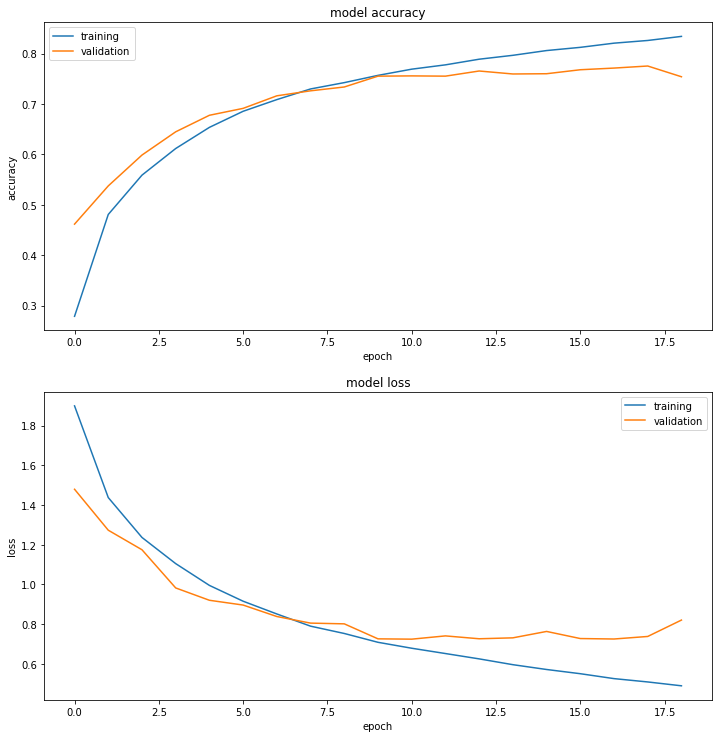

In [ ]:
plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(model.history.history['accuracy'], model.history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(model.history.history['loss'], model.history.history['val_loss'], 'loss', 212)

In [ ]:
test_pred = model.predict_classes(X_test)
train_pred = model.predict_classes(X_train)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
metrics(test_val, test_pred)

Accuracy Score: 0.7539
Confusion Matrix:
 [[866   7  42  10  13   0   6   5  48   3]
 [ 35 871   4   2   2   0   8   2  47  29]
 [ 97   0 666  23  88  20  84  13   7   2]
 [ 36   5  96 582  81  44 111  21  15   9]
 [ 28   3  70  35 761   4  72  23   4   0]
 [ 21   1  79 225  60 527  41  34   8   4]
 [  8   3  42  30  27   2 880   1   7   0]
 [ 42   1  59  36  90  20  11 734   2   5]
 [ 70  12  12   5   7   0   8   1 875  10]
 [ 83  80   6   3   7   1  10   8  25 777]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.87      0.76      1000
           1       0.89      0.87      0.88      1000
           2       0.62      0.67      0.64      1000
           3       0.61      0.58      0.60      1000
           4       0.67      0.76      0.71      1000
           5       0.85      0.53      0.65      1000
           6       0.71      0.88      0.79      1000
           7       0.87      0.73      0.80      1000
           8    

In [ ]:
metrics(train_val, train_pred)

Accuracy Score: 0.84626
Confusion Matrix:
 [[4693    3  110   10   42    0   11    8  121    2]
 [  57 4743    7   14    2    0   26    2  114   35]
 [ 261    1 4074   73  280   32  237   13   27    2]
 [ 159    9  331 3516  328  135  410   54   42   16]
 [  93    3  212   88 4348    4  186   57    9    0]
 [  45    4  355 1064  238 2974  174  134    7    5]
 [  29    5   94   56   46    4 4755    1   10    0]
 [  96    3  128  134  359   47   12 4207   11    3]
 [ 188    4   37   10    5    0   15    1 4736    4]
 [ 285  229   20   37    9    1   36   16  100 4267]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      5000
           1       0.95      0.95      0.95      5000
           2       0.76      0.81      0.79      5000
           3       0.70      0.70      0.70      5000
           4       0.77      0.87      0.82      5000
           5       0.93      0.59      0.73      5000
           6       0.81

#### Trial 4

In [ ]:
def squeeze_excite_block(filters,input):                      
    se = tf.keras.layers.GlobalAveragePooling2D()(input) #(batch size and channel)
    se = tf.keras.layers.Reshape((1, filters))(se) 
    se = tf.keras.layers.Dense(filters//16, activation='relu')(se)
    se = tf.keras.layers.Dense(filters, activation='sigmoid')(se)
    se = tf.keras.layers.multiply([input, se])
    return se

def make_model():
        s = tf.keras.Input(shape=X_train.shape[1:]) 
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(s)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)          


        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)


        x = tf.keras.layers.concatenate([tf.keras.layers.GlobalMaxPooling2D()(x),
                                         tf.keras.layers.GlobalAveragePooling2D()(x)])

        x = tf.keras.layers.Dense(10,activation='softmax',use_bias=False,
                                  kernel_regularizer=tf.keras.regularizers.l1(0.00025))(x)
        model = tf.keras.Model(inputs=s, outputs=x)
        model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
        return model

batch_size=32
supermodel=[]
for i in range(5):
        np.random.seed(i)
        model=make_model()                
        model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit(X_train, y_train, batch_size=batch_size,shuffle=True,
                    steps_per_epoch=len(X_train) / batch_size, epochs=15,verbose=0)
        model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit(X_train, y_train, batch_size=batch_size,shuffle=True,
                    steps_per_epoch=len(X_train) / batch_size, epochs=3,verbose=0)
        model.compile(optimizer=optimizers.Adam(lr=0.00001), loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit(X_train, y_train, batch_size=batch_size,shuffle=True,
                    steps_per_epoch=len(X_train) / batch_size, epochs=3,verbose=0)
        model.fit(X_train, y_train, batch_size=batch_size,shuffle=True, epochs=1,verbose=0)
        supermodel.append(model)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:

pred =np.asarray([a.predict(X_test) for a in supermodel])
predictions = np.argmax(np.mean(pred,axis=0),axis=1)

In [ ]:
metrics(test_val, predictions)

Accuracy Score: 0.8806
Confusion Matrix:
 [[911   7  20  10   4   0   2   5  28  13]
 [  4 947   1   4   2   0   2   0   8  32]
 [ 44   0 816  35  36  29  27   8   5   0]
 [ 13   3  50 756  30  91  27  22   4   4]
 [  6   1  38  37 863  17  17  18   3   0]
 [  5   1  23 109  30 806   5  20   1   0]
 [  5   1  23  22  14   8 922   2   2   1]
 [  6   1  11  15  25  21   3 915   0   3]
 [ 26   9   2   6   1   2   4   0 940  10]
 [ 12  32   2   5   1   1   2   2  13 930]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      1000
           1       0.95      0.95      0.95      1000
           2       0.83      0.82      0.82      1000
           3       0.76      0.76      0.76      1000
           4       0.86      0.86      0.86      1000
           5       0.83      0.81      0.82      1000
           6       0.91      0.92      0.92      1000
           7       0.92      0.92      0.92      1000
           8    

### Transfer Learning

##### VGG 16

In [ ]:
###Transfer Learning##
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

In [ ]:
IMAGE_SIZE + [3]

[32, 32, 3]

In [ ]:
IMAGE_SIZE = [32, 32]

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg16.output)

In [ ]:
x = Dense(32, activation='relu') (x)

prediction = Dense(10, activation='softmax')(x)


# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)


# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [ ]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model.fit(X_train, y_train, batch_size = 16, epochs = 100, callbacks=[early_stop], validation_data = (X_test, y_test))

Epoch 1/100
3125/3125 [==============================] - 29s 9ms/step - loss: 3.0897 - accuracy: 0.2835 - val_loss: 1.4124 - val_accuracy: 0.5019
Epoch 2/100
3125/3125 [==============================] - 27s 9ms/step - loss: 1.3626 - accuracy: 0.5138 - val_loss: 1.3037 - val_accuracy: 0.5449
Epoch 3/100
3125/3125 [==============================] - 27s 9ms/step - loss: 1.2763 - accuracy: 0.5493 - val_loss: 1.2844 - val_accuracy: 0.5625
Epoch 4/100
3125/3125 [==============================] - 27s 9ms/step - loss: 1.2523 - accuracy: 0.5647 - val_loss: 1.2561 - val_accuracy: 0.5679
Epoch 5/100
3125/3125 [==============================] - 27s 9ms/step - loss: 1.2163 - accuracy: 0.5782 - val_loss: 1.2396 - val_accuracy: 0.5716
Epoch 6/100
3125/3125 [==============================] - 27s 9ms/step - loss: 1.1929 - accuracy: 0.5874 - val_loss: 1.2453 - val_accuracy: 0.5768
Epoch 7/100
3125/3125 [==============================] - 27s 9ms/step - loss: 1.1929 - accuracy: 0.5935 - val_loss: 1.2167 -

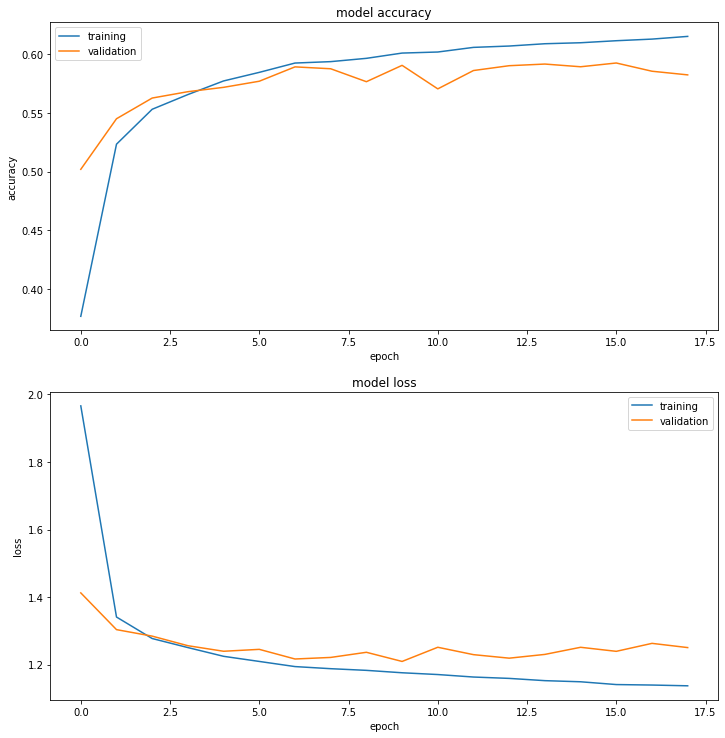

In [ ]:
plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(model.history.history['accuracy'], model.history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(model.history.history['loss'], model.history.history['val_loss'], 'loss', 212)

In [ ]:
train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [ ]:
train_pred_val = np.argmax(train_pred, axis = 1)

test_pred_val = np.argmax(test_pred, axis = 1)

In [ ]:
metrics(train_val, train_pred_val)

Accuracy Score: 0.6235
Confusion Matrix:
 [[3457  155  340   77  173   46   12   63  543  134]
 [ 166 3661   52  174  116   88   27   34  273  409]
 [ 300   66 2487  295 1045  267  240  184   94   22]
 [  69  126  356 2282  550  960  213  156  144  144]
 [ 171   40  236  178 3633  118  177  293  106   48]
 [  28   92  276  789  486 2861  104  254   56   54]
 [  17  113  442  464  674  286 2880   37   76   11]
 [ 161   82  144  189  876  270   28 3031   48  171]
 [ 456  219   60  105  130   25   16   24 3767  198]
 [ 248  749   42  197  181   56   28   99  284 3116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.69      5000
           1       0.69      0.73      0.71      5000
           2       0.56      0.50      0.53      5000
           3       0.48      0.46      0.47      5000
           4       0.46      0.73      0.56      5000
           5       0.57      0.57      0.57      5000
           6       0.77 

In [ ]:
metrics(test_val, test_pred_val)

Accuracy Score: 0.5822
Confusion Matrix:
 [[648  31  92  19  38   4   7  15 117  29]
 [ 45 689  15  45  20  18   3   6  51 108]
 [ 68  18 447  65 213  67  66  40  15   1]
 [ 14  29  81 400 120 187  54  45  33  37]
 [ 28   7  66  42 682  33  40  69  27   6]
 [ 11  14  64 161  86 560  25  54  16   9]
 [  9  35  86  93 143  63 548   4  15   4]
 [ 37  25  27  42 183  60   9 561  14  42]
 [118  63  16  19  26   8   7   9 692  42]
 [ 57 171   9  44  29  11   6  17  61 595]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64      1000
           1       0.64      0.69      0.66      1000
           2       0.50      0.45      0.47      1000
           3       0.43      0.40      0.41      1000
           4       0.44      0.68      0.54      1000
           5       0.55      0.56      0.56      1000
           6       0.72      0.55      0.62      1000
           7       0.68      0.56      0.62      1000
           8    

##### VGG 19

In [ ]:
vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=IMAGE_SIZE+[3])

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
for layers in vgg19.layers:
  layers.trainable = False

In [ ]:
x = Flatten()(vgg19.output)

In [ ]:

x = Dense(32, activation='relu') (x)

prediction = Dense(10, activation='softmax')(x)


# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)


# view the structure of the model
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [ ]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model.fit(X_train, y_train, batch_size = 16, epochs = 100, callbacks=[early_stop], validation_data = (X_test, y_test))

Epoch 1/100
3125/3125 [==============================] - 37s 11ms/step - loss: 2.6779 - accuracy: 0.3233 - val_loss: 1.4447 - val_accuracy: 0.4911
Epoch 2/100
3125/3125 [==============================] - 34s 11ms/step - loss: 1.3620 - accuracy: 0.5297 - val_loss: 1.3121 - val_accuracy: 0.5530
Epoch 3/100
3125/3125 [==============================] - 39s 12ms/step - loss: 1.2604 - accuracy: 0.5652 - val_loss: 1.2823 - val_accuracy: 0.5653
Epoch 4/100
3125/3125 [==============================] - 39s 12ms/step - loss: 1.2063 - accuracy: 0.5884 - val_loss: 1.2589 - val_accuracy: 0.5711
Epoch 5/100
3125/3125 [==============================] - 34s 11ms/step - loss: 1.1807 - accuracy: 0.5942 - val_loss: 1.2307 - val_accuracy: 0.5912
Epoch 6/100
3125/3125 [==============================] - 34s 11ms/step - loss: 1.1507 - accuracy: 0.6075 - val_loss: 1.2248 - val_accuracy: 0.5838
Epoch 7/100
3125/3125 [==============================] - 39s 13ms/step - loss: 1.1280 - accuracy: 0.6121 - val_loss: 1

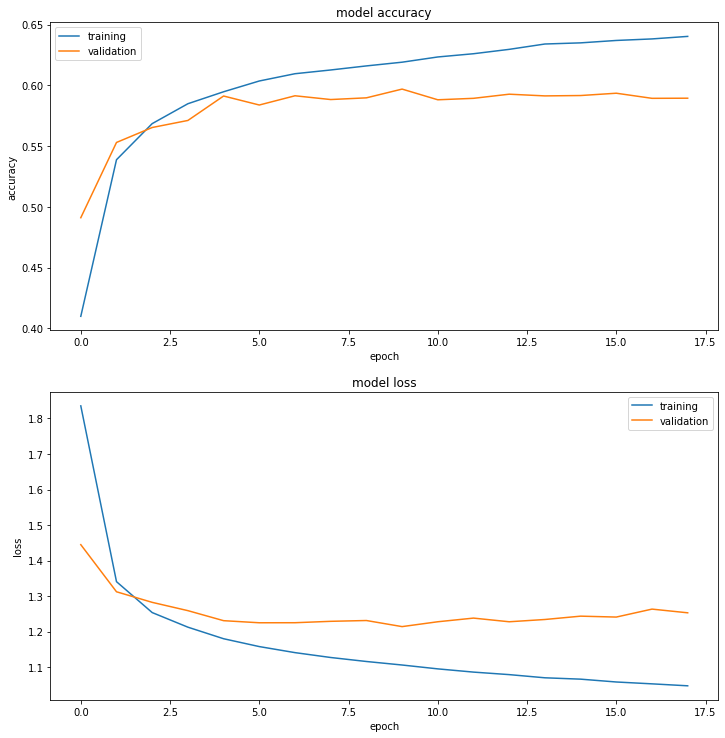

In [ ]:
plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(model.history.history['accuracy'], model.history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(model.history.history['loss'], model.history.history['val_loss'], 'loss', 212)

In [ ]:
train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [ ]:
train_pred_val = np.argmax(train_pred, axis = 1)

test_pred_val = np.argmax(test_pred, axis = 1)

In [ ]:
metrics(train_val, train_pred_val)

Accuracy Score: 0.6495
Confusion Matrix:
 [[3196  224  209  123  120   31   62   89  703  243]
 [  26 3801   39  143   42   50   38   71  201  589]
 [ 152  134 2777  334  438  293  541  176  119   36]
 [  49  211  241 2628  257  715  419  199  120  161]
 [  83   89  391  328 2874  174  428  433  129   71]
 [  21  146  235  970  283 2689  197  337   49   73]
 [  12  192  230  331  219  230 3662   38   67   19]
 [  37  126  136  270  538  245   71 3306   83  188]
 [ 123  349   40   65   86   23   12   21 4095  186]
 [  48  648   21  173   96   75   27  174  291 3447]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.64      0.73      5000
           1       0.64      0.76      0.70      5000
           2       0.64      0.56      0.60      5000
           3       0.49      0.53      0.51      5000
           4       0.58      0.57      0.58      5000
           5       0.59      0.54      0.56      5000
           6       0.67 

In [ ]:
metrics(test_val, test_pred_val)

Accuracy Score: 0.5894
Confusion Matrix:
 [[542  33  83  38  25   5  16  34 167  57]
 [ 10 683   7  40  19  17  11  17  58 138]
 [ 52  25 458  90 102  54 121  53  40   5]
 [ 15  52  41 459  61 154  97  40  29  52]
 [ 23  14  76  69 534  47 109  78  36  14]
 [  9  34  58 187  57 510  47  68  13  17]
 [  5  39  60  77  64  56 683   6   5   5]
 [ 17  28  34  59  91  58  21 621  23  48]
 [ 35  94  20  26  10   6   3  11 739  56]
 [ 17 143   7  31  21  19   5  35  57 665]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.54      0.63      1000
           1       0.60      0.68      0.64      1000
           2       0.54      0.46      0.50      1000
           3       0.43      0.46      0.44      1000
           4       0.54      0.53      0.54      1000
           5       0.55      0.51      0.53      1000
           6       0.61      0.68      0.65      1000
           7       0.64      0.62      0.63      1000
           8    